In [1]:
import numpy as np

from scipy import constants
from matplotlib import pyplot as plt

import optical_modulation as omod

from light_source import LightSource
from optical_fiber import OpticalFiber
from photodetector import Photodector

# Implémentation du projet

## Génération de la source optique

On implémente une source optique de forme Lorenzienne très étroite dans la bande C $(\lambda \approx 1550 \mathrm{~nm})$.

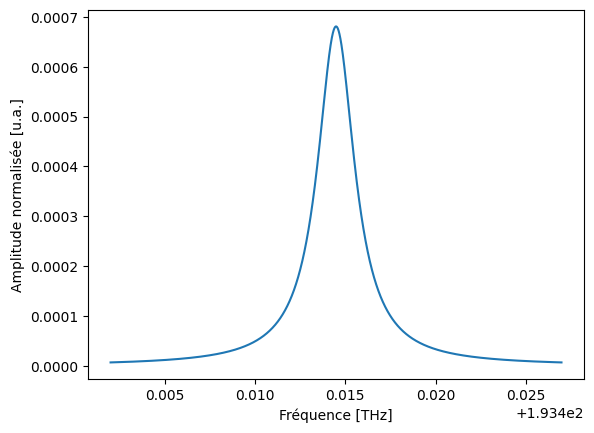

In [32]:
central_wavelength = 1550e-9                                                        # 1550 nm
central_frequency = constants.c / central_wavelength
wavelength_linewidth = 10e-12                                                       # 10 pm

max_frequency = constants.c / (central_wavelength - wavelength_linewidth / 2)
min_frequency = constants.c / (central_wavelength + wavelength_linewidth / 2)
frequency_linewidth = max_frequency - min_frequency

light_source = LightSource(
        frequency=central_frequency,
        frequency_linewidth=frequency_linewidth,
        power=1e-3,                                                                 # 1 mW = 0 dBm
        frequency_step=2.5e6,                                                       # 2.5 MHz
        bandwidth=20 * frequency_linewidth,
        shape="lorentzian",
    )

plt.plot(light_source.frequencies / 1e12, light_source.normalized_lineshape)
plt.xlabel("Fréquence [THz]")
plt.ylabel("Amplitude normalisée [u.a.]")
plt.show()

## Génération de l'impulsion optique

On début avec une impulsion dite *sine-sloped*, et on la compare avec une impulsion carrée.

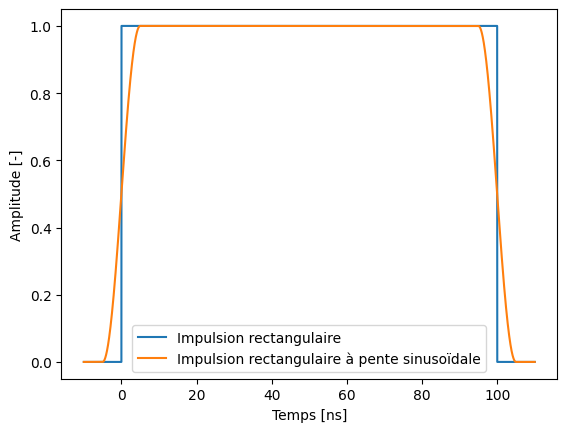

In [33]:
pulse_width = 100e-9        # 100 ns
segment_duration = 1e-11
rise_time = 10e-9

time = omod.get_pulse_time_array(pulse_width, segment_duration, rise_time)

rec_pulse = omod.get_rectangular_pulse(pulse_width, time)
sine_pulse = omod.get_sine_rectangular_pulse(pulse_width, time, rise_time)

plt.plot()
plt.plot(time * 1e9, rec_pulse, label="Impulsion rectangulaire")
plt.plot(time * 1e9, sine_pulse, label="Impulsion rectangulaire à pente sinusoïdale")
plt.xlabel("Temps [ns]")
plt.ylabel("Amplitude [-]")
plt.legend()
plt.show()

L'impulsino optique aura donc la distribution temporelle et fréquentielle suivante.

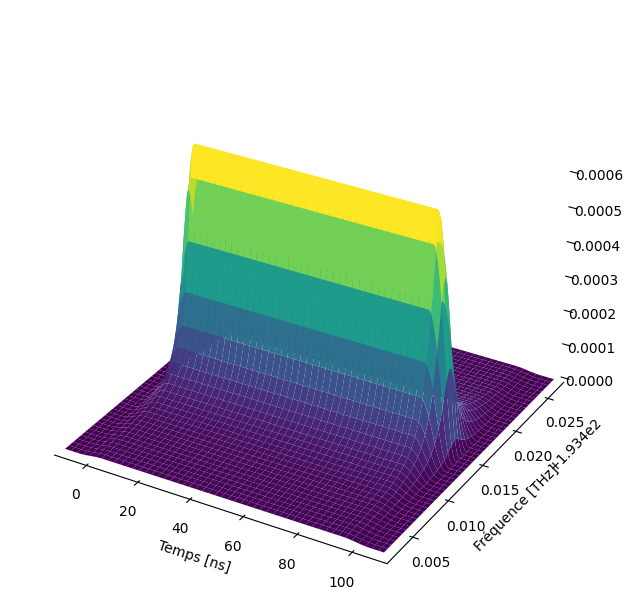

In [62]:
distribution = np.outer(light_source.normalized_lineshape, sine_pulse)
TIME, FREQ = np.meshgrid(time, light_source.frequencies, )

fig = plt.figure(figsize=(8, 6), layout="constrained")
ax = fig.add_subplot(111, projection='3d')

TIME *= 1e9
FREQ /= 1e12

ax.plot_surface(TIME, FREQ, distribution, cmap='viridis', linewidth=0)

ax.set_xlabel("Temps [ns]")
ax.set_ylabel("Fréquence [THz]")
ax.set_xlim(TIME.min(), TIME.max())
ax.set_ylim(FREQ.min(), FREQ.max())

ax.set_facecolor('white')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_visible(False)
ax.grid(visible=False)

plt.show()